In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import scipy.stats as stats
from sklearn import preprocessing, linear_model, model_selection, neighbors, svm, naive_bayes, metrics

# Importing data

In [2]:
df=pd.read_csv('../Datasets/High Earner.csv')

# Data Exploration and Preparation 

## 1. Exploring data structure and content

In [3]:
df.head(3)

,age,employer type,educational level,marital status,job type,relationship status,ethnicity,sex,capital gains,capital losses,hours worked per week,country of birth,high income?
0,56,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,No
1,46,Private,11,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,No
2,50,?,9,Married-civ-spouse,?,Husband,Black,Male,0,0,40,United-States,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
age                      32561 non-null int64
employer type            32561 non-null object
educational level        32561 non-null int64
marital status           32561 non-null object
job type                 32561 non-null object
relationship status      32561 non-null object
ethnicity                32561 non-null object
sex                      32561 non-null object
capital gains            32561 non-null int64
capital losses           32561 non-null int64
hours worked per week    32561 non-null int64
country of birth         32561 non-null object
high income?             32561 non-null object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [5]:
df.describe(include='all')

,age,employer type,educational level,marital status,job type,relationship status,ethnicity,sex,capital gains,capital losses,hours worked per week,country of birth,high income?
count,32561.000000,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,No
freq,NaN,22696,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [6]:
#Counting the unique values for categorical columns.
for i in [1,3,4,5,6,7,11,12]:
    print("Counts for the column '"+df.columns[i]+"' is: ")
    print(df.iloc[:,i].value_counts())
    print("---------------------------------------------------------")

Counts for the column 'employer type' is: 
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: employer type, dtype: int64
---------------------------------------------------------
Counts for the column 'marital status' is: 
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital status, dtype: int64
---------------------------------------------------------
Counts for the column 'job type' is: 
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handl

## 2. Visualising data

### a. Categorical data:

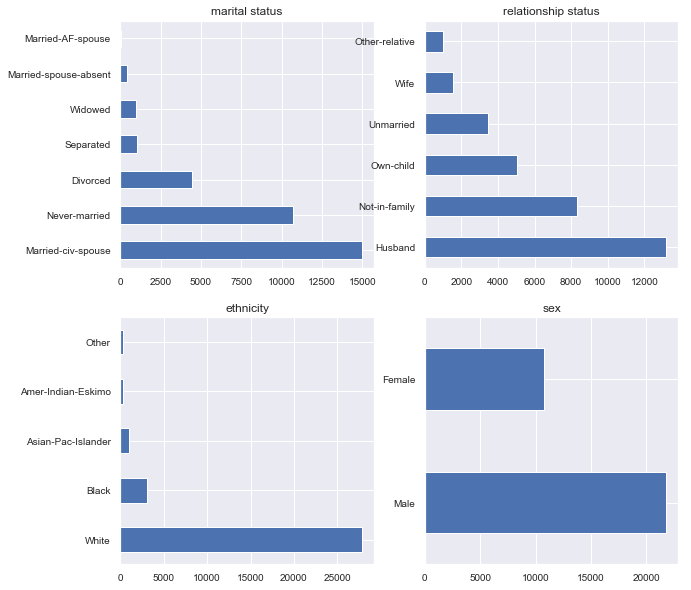

In [7]:
(_, axs) = plt.subplots(2, 2, figsize=(10,10))
ax = df['marital status'].value_counts().plot.barh(title='marital status',color='b',fontsize=10,ax=axs[0][0])
ax = df['relationship status'].value_counts().plot.barh(title='relationship status',color='b',fontsize=10,ax=axs[0][1])
ax = df['ethnicity'].value_counts().plot.barh(title='ethnicity',color='b',fontsize=10,ax=axs[1][0])
ax = df['sex'].value_counts().plot.barh(title='sex',color='b',fontsize=10,ax=axs[1][1]);
#plt.title("Histograms showing counts for marital status, relationship status, ethnicity and sex",\
          #fontdict={'fontsize':15},loc='right');

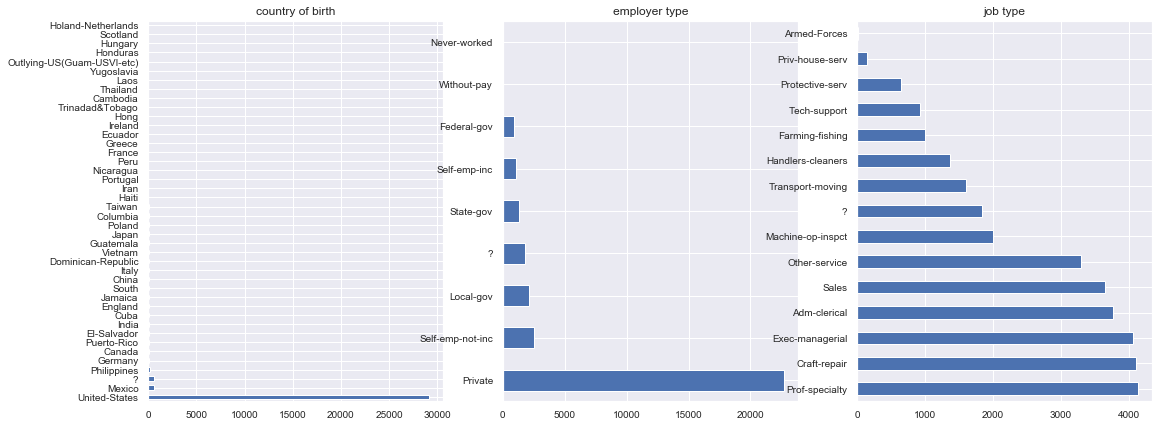

In [8]:
(_, axs) = plt.subplots(1, 3, figsize=(18,7))
ax = df['country of birth'].value_counts().plot.barh(title='country of birth',color='b',fontsize=10,ax=axs[0])
ax = df['employer type'].value_counts().plot.barh(title='employer type',color='b',fontsize=10,ax=axs[1])
ax = df['job type'].value_counts().plot.barh(title='job type',color='b',fontsize=10,ax=axs[2])

### Numeric data:

C:\Users\Amine\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


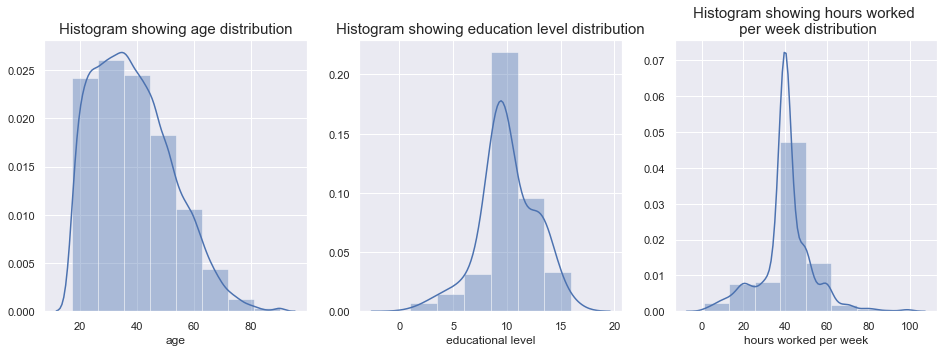

In [9]:
plt.figure(figsize=(16,5))
fig = plt.subplot(131)
sns.distplot(df['age'],kde=True,bins=8,color='b')
plt.title('Histogram showing age distribution',fontsize=15)
fig = plt.subplot(132)
sns.distplot(df['educational level'],kde_kws={"bw":1.2},bins=6,color='b')
plt.title('Histogram showing education level distribution',fontsize=15)
fig = plt.subplot(133)
sns.distplot(df['hours worked per week'],kde_kws={"bw":2.8},bins=8,color='b')
plt.title('Histogram showing hours worked \n per week distribution',fontsize=15)
plt.show()

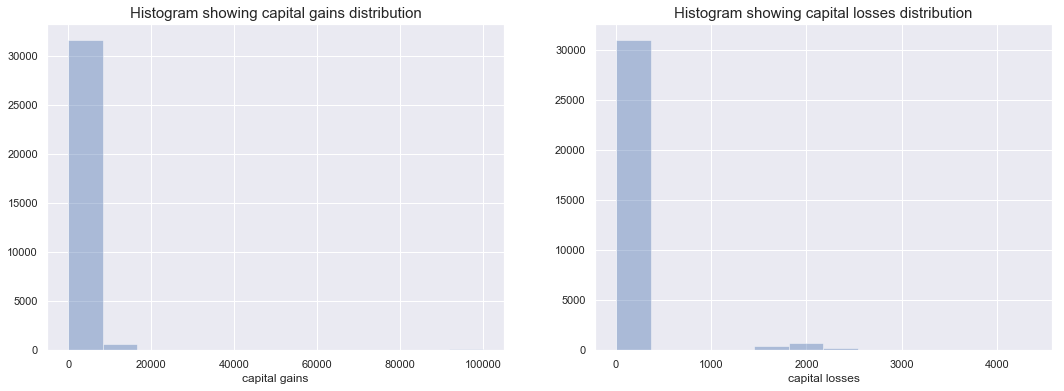

In [10]:
plt.figure(figsize=(18,6))
fig = plt.subplot(121)
sns.distplot(df['capital gains'],kde=False,bins=12,color='b')
plt.title('Histogram showing capital gains distribution',fontsize=15)
fig = plt.subplot(122)
sns.distplot(df['capital losses'],kde=False,bins=12,color='b')
plt.title('Histogram showing capital losses distribution',fontsize=15)
plt.show()

# 3. Missing data

## Investigating and identifying missing data

In [11]:
df.isnull().sum()
#I can notice that there are no "None/NaN" data in this df. 

age                      0
employer type            0
educational level        0
marital status           0
job type                 0
relationship status      0
ethnicity                0
sex                      0
capital gains            0
capital losses           0
hours worked per week    0
country of birth         0
high income?             0
dtype: int64

In [12]:
Empty=np.where(df.applymap(lambda x: x==''),'YES','NO')
np.unique(Empty,return_counts=True)
#I can notice that there are no empty entries/values in this df. 

(array(['NO'], dtype='<U3'), array([423293], dtype=int64))

In [13]:
Symbol=np.where(df.applymap(lambda x: x=='?'),'YES','NO')
np.unique(Symbol,return_counts=True)
#There are 4262 values missing represented by "?".

(array(['NO', 'YES'], dtype='<U3'), array([419031,   4262], dtype=int64))

In [14]:
#Detecting the categorical columns containing the empty values represented by "?".
for i in [1,3,4,5,6,7,11,12]:
    print(df.iloc[:,i].name +': '+str((df.iloc[:,i]=='?').sum()))

employer type: 1836
marital status: 0
job type: 1843
relationship status: 0
ethnicity: 0
sex: 0
country of birth: 583
high income?: 0


In [15]:
#Calculating the number of rows containing missing data.
mask=((df.iloc[:,1]=='?')|(df.iloc[:,4]=='?'))|(df.iloc[:,11]=='?')
mask.value_counts()

False    30162
True      2399
dtype: int64

## Dealing with missing data

### Dropping them (df2)

In [16]:
df2=pd.DataFrame(df.values, columns=['age','employer type','educational level','marital status','job type','relationship status'\
                                     ,'ethnicity','sex','capital gains','capital losses','hours worked per week',\
                                    'country of birth','high income?'])

In [17]:
for i in range(1,32561):
    if df2.loc[i,'job type']=='?':
        df2.drop(labels=i,inplace=True)
    elif df2.loc[i,'employer type']=='?':
        df2.drop(labels=i,inplace=True)
    elif df2.loc[i,'country of birth']=='?':
        df2.drop(labels=i,inplace=True)

In [18]:
df2.shape

(30162, 13)

### Replacing them with the mode (df3)

In [19]:
df3=pd.DataFrame(df.values, columns=['age','employer type','educational level','marital status','job type','relationship status'\
                                     ,'ethnicity','sex','capital gains','capital losses','hours worked per week',\
                                    'country of birth','high income?'])

In [20]:
for i in range(1,32561):
    if df3.loc[i,'job type']=='?':
        df3.loc[i,'job type']='Prof-specialty'
    if df3.loc[i,'employer type']=='?':
        df3.loc[i,'employer type']='Private'
    if df3.loc[i,'country of birth']=='?':
        df3.loc[i,'country of birth']='United-States'

In [21]:
#checking that categorical data are all non-null after cleaning.
for i in [1,3,4,5,6,7,11,12]:
    print(df3.iloc[:,i].name +': '+str((df3.iloc[:,i]=='?').sum()))

employer type: 0
marital status: 0
job type: 0
relationship status: 0
ethnicity: 0
sex: 0
country of birth: 0
high income?: 0


# 4. Outliers and noise

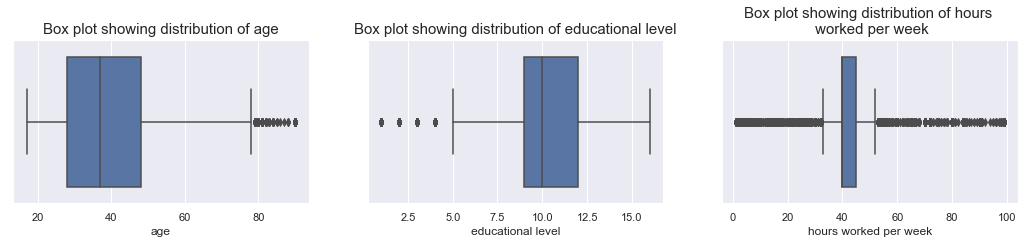

In [22]:
plt.figure(figsize=(18,3))
fig = plt.subplot(131)
sns.boxplot('age',data=df)
plt.title('Box plot showing distribution of age',fontsize=15)
fig = plt.subplot(132)
sns.boxplot('educational level',data=df)
plt.title('Box plot showing distribution of educational level',fontsize=15)
fig = plt.subplot(133)
sns.boxplot('hours worked per week',data=df)
plt.title('Box plot showing distribution of hours \n worked per week',fontsize=15)
plt.show()

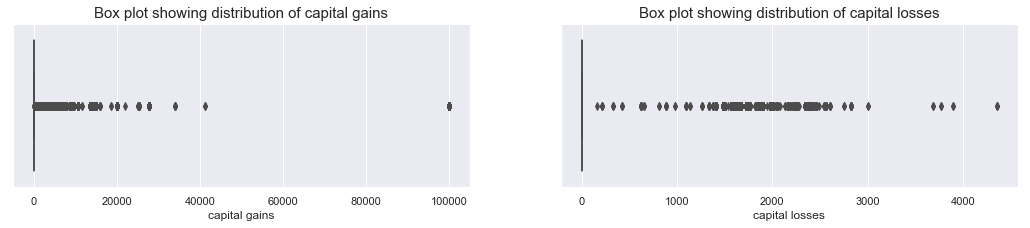

In [23]:
plt.figure(figsize=(18,3))
fig = plt.subplot(121)
sns.boxplot('capital gains',data=df)
plt.title('Box plot showing distribution of capital gains',fontsize=15)
fig = plt.subplot(122)
sns.boxplot('capital losses',data=df)
plt.title('Box plot showing distribution of capital losses',fontsize=15)
plt.show()

In [24]:
# "Age" outliers.
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
IQR=q3-q1
print('Upper whisker limit of the boxplot:  '+str(q3+1.5*IQR))
print('Total number of respondents more than 78 year-old:  '+str(df[df['age']>78].shape[0]))
print('Outliers range [min,max]: '+'['+str(df[df['age']>78]['age'].min())+','+str(df[(df['age']>78)]['age'].max())+']')

Upper whisker limit of the boxplot:  78.0
Total number of respondents more than 78 year-old:  143
Outliers range [min,max]: [79,90]


In [25]:
# "Educational level" outliers.
q1=df['educational level'].quantile(0.25)
q3=df['educational level'].quantile(0.75)
IQR=q3-q1
print('Lower whisker limit of the boxplot:  '+str(q1-1.5*IQR))
print('Total number of respondents with an educational level 4 at the most:  '+str(df[df['educational level']<5].shape[0]))
print('Outliers range [min,max]: '+'['+str(df[df['educational level']<5]['educational level'].min())+','+\
str(df[(df['educational level']<5)]['educational level'].max())+']')
print('Total number of respondents with an educational level 1:  '+str(df[df['educational level']==1].shape[0]))

Lower whisker limit of the boxplot:  4.5
Total number of respondents with an educational level 4 at the most:  1198
Outliers range [min,max]: [1,4]
Total number of respondents with an educational level 1:  51


In [26]:
# "Hours worked per week" outliers
q1=df['hours worked per week'].quantile(0.25)
q3=df['hours worked per week'].quantile(0.75)
IQR=q3-q1
print('Lower whisker limit of the boxplot:  '+str(q1-1.5*IQR))
print('Upper whisker limit of the boxplot:  '+str(q3+1.5*IQR))
print('Total number of respondents who work less than 33 hours:  '+str(df[df['hours worked per week']<32.5].shape[0]))
print('Total number of respondents who work more than 52 hours:  '+str(df[df['hours worked per week']>52.5].shape[0]))
print('Lower part outliers range [min,max]: '+'['+str(df[df['hours worked per week']<32.5]['hours worked per week'].min())+','+\
str(df[df['hours worked per week']<32.5]['hours worked per week'].max())+']')
print('Upper part outliers range [min,max]: '+'['+str(df[df['hours worked per week']>52.5]['hours worked per week'].min())+','+\
str(df[df['hours worked per week']>52.5]['hours worked per week'].max())+']')
for i in [1,2,80,99]:
    print('Number of respondents working '+str(i)+' hrs a week: '+ str(df[df['hours worked per week']==i].shape[0]))

Lower whisker limit of the boxplot:  32.5
Upper whisker limit of the boxplot:  52.5
Total number of respondents who work less than 33 hours:  5516
Total number of respondents who work more than 52 hours:  3492
Lower part outliers range [min,max]: [1,32]
Upper part outliers range [min,max]: [53,99]
Number of respondents working 1 hrs a week: 20
Number of respondents working 2 hrs a week: 32
Number of respondents working 80 hrs a week: 133
Number of respondents working 99 hrs a week: 85


In [27]:
# "Capital gains" outliers. 
q1=df['capital gains'].quantile(0.25)
q3=df['capital gains'].quantile(0.75)
IQR=q3-q1
print('Upper whisker limit of the boxplot:  '+str(q3+1.5*IQR))
print('Total number of respondents who achieved a gain in their capital:  '+str(df[df['capital gains']>0].shape[0]))
print('Outliers range [min,max]: '+'['+str(df[df['capital gains']>0]['capital gains'].min())+','+\
str(df[(df['capital gains']>0)]['capital gains'].max())+']')

Upper whisker limit of the boxplot:  0.0
Total number of respondents who achieved a gain in their capital:  2712
Outliers range [min,max]: [114,99999]


In [28]:
# "Capital losses" outliers. 
q1=df['capital losses'].quantile(0.25)
q3=df['capital losses'].quantile(0.75)
IQR=q3-q1
print('Upper whisker limit of the boxplot:  '+str(q3+1.5*IQR))
print('Total number of respondents who marked a loss in their capital:  '+str(df[df['capital losses']>0].shape[0]))
print('Outliers range [min,max]: '+'['+str(df[df['capital losses']>0]['capital losses'].min())+','+\
str(df[(df['capital losses']>0)]['capital losses'].max())+']')
print('Total number of respondents who marked a loss of 4356 in their capital:  '+str(df[df['capital losses']==4356].shape[0]))

Upper whisker limit of the boxplot:  0.0
Total number of respondents who marked a loss in their capital:  1519
Outliers range [min,max]: [155,4356]
Total number of respondents who marked a loss of 4356 in their capital:  3


# 5. Erroneous data 

## Investigating and identifying erroneous data

In [29]:
print('Number of respondents who achieved 99999 gain in their capital is: '+str(df[df['capital gains']==99999].shape[0]))

Number of respondents who achieved 99999 gain in their capital is: 159


In [30]:
df[df['sex']=='Male']['relationship status'].value_counts()

Husband           13192
Not-in-family      4430
Own-child          2823
Unmarried           792
Other-relative      551
Wife                  2
Name: relationship status, dtype: int64

In [31]:
df[df['sex']=='Female']['relationship status'].value_counts()

Not-in-family     3875
Unmarried         2654
Own-child         2245
Wife              1566
Other-relative     430
Husband              1
Name: relationship status, dtype: int64

In [32]:
df[df['employer type']=='Never-worked']['job type'].value_counts()

?    7
Name: job type, dtype: int64

## Dealing with erroneous data

In [33]:
# Exploring the ethnicity of people who were born in "South"
df3[df3['country of birth']=='South']['ethnicity'].value_counts()

Asian-Pac-Islander    77
Amer-Indian-Eskimo     2
White                  1
Name: ethnicity, dtype: int64

In [34]:
#Replacing erroneous data for both datasets df2, df3.
for i in df2.index:
    if (df2.loc[i,'sex']=='Male')&(df2.loc[i,'relationship status']=='Wife'):
        df2.drop(labels=i,inplace=True)
    elif (df2.loc[i,'sex']=='Female')&(df2.loc[i,'relationship status']=='Husband'):
        df2.drop(labels=i,inplace=True)
    elif df2.loc[i,'employer type']=='Never-worked':
        df2.loc[i,'job type']='no-job'
    elif (df2.loc[i,'country of birth']=='South')&(df2.loc[i,'ethnicity']=='Asian-Pac-Islander'):        
        df2.loc[i,'country of birth']='South-Korea'
    elif (df2.loc[i,'country of birth']=='South')&(df2.loc[i,'ethnicity']=='Amer-Indian-Eskimo'):
        df2.loc[i,'country of birth']='South-Sudan' 
    elif (df2.loc[i,'country of birth']=='South')&(df2.loc[i,'ethnicity']=='White'):
        df2.loc[i,'country of birth']='South-Africa'
    elif df2.loc[i,'country of birth']=='Hong':
        df2.loc[i,'country of birth']='Hong-Kong'
        

for i in df3.index:
    if (df3.loc[i,'sex']=='Male')&(df3.loc[i,'relationship status']=='Wife'):
        df3.drop(labels=i,inplace=True)
    elif (df3.loc[i,'sex']=='Female')&(df3.loc[i,'relationship status']=='Husband'):
        df3.drop(labels=i,inplace=True)
    elif df3.loc[i,'employer type']=='Never-worked':
        df3.loc[i,'job type']='no-job'
    elif (df3.loc[i,'country of birth']=='South')&(df3.loc[i,'ethnicity']=='Asian-Pac-Islander'):        
        df3.loc[i,'country of birth']='South-Korea'
    elif (df3.loc[i,'country of birth']=='South')&(df3.loc[i,'ethnicity']=='Amer-Indian-Eskimo'):
        df3.loc[i,'country of birth']='South-Sudan' 
    elif (df3.loc[i,'country of birth']=='South')&(df3.loc[i,'ethnicity']=='White'):
        df3.loc[i,'country of birth']='South-Africa'
    elif df3.loc[i,'country of birth']=='Hong':
        df3.loc[i,'country of birth']='Hong-Kong'

# 6. Repeated data 

In [35]:
dfd=pd.DataFrame(df.values, columns=['age','employer type','educational level','marital status','job type','relationship status'\
                                     ,'ethnicity','sex','capital gains','capital losses','hours worked per week',\
                                    'country of birth','high income?'])

In [36]:
a=dfd.drop(['employer type','job type','country of birth'],axis=1).duplicated(keep=False).sum()
print('number of duplicates including the first occurence is: '+str(a))

number of duplicates including the first occurence is: 15132


In [37]:
b=dfd.drop(['employer type','job type','country of birth'],axis=1).drop_duplicates(keep='first').shape[0]
print('number of rows without duplicates is: '+str(b))

number of rows without duplicates is: 21146


In [38]:
print('number of duplicates is: '+str(dfd.shape[0]-b))

number of duplicates is: 11415


In [39]:
c=a-(dfd.shape[0]-b)
print('number of rows having duplicates is: '+str(c))

number of rows having duplicates is: 3717





# Data mining

## 1. Data mining algorithms

### First dataset (df2)

In [40]:
# Split the data into: Training, Validation, and Testing sets. 
X=df2.loc[:,['age','educational level','capital gains','capital losses','hours worked per week']]
X=X.values
y=df2['high income?'].values

rs = np.random.RandomState(seed=10)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.4, shuffle=True,random_state=rs)
x_test, x_valid, y_test, y_valid = model_selection.train_test_split(x_test,y_test, test_size = 0.5, shuffle=True,random_state=rs)

print('Number of rows for training data is:   ',x_train.shape[0])
print('Number of rows for validation data is: ',x_valid.shape[0])
print('Number of rows for testing data is:    ',x_test.shape[0])

score_df2=[]

#KNN Classifier:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
score=metrics.accuracy_score(y_valid,y_pred)
print('Accuracy for KNN is:                   '+str(score))
score_df2+=[score]

#NB-Gaussian Classifier:
clf = naive_bayes.GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
score=metrics.accuracy_score(y_valid,y_pred)
print('Accuracy for NB-Gaussian is:           '+str(score))
score_df2+=[score]

#NB-Multinomial Classifier:
clf = naive_bayes.MultinomialNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
score=metrics.accuracy_score(y_pred, y_valid)
print('Accuracy for NB-Multinomial is:        '+str(score))
score_df2+=[score]

#Logistic Regression Classifier:
clf = linear_model.LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
score=metrics.accuracy_score(y_valid,y_pred)
print('Accuracy for LR is:                    '+str(score))
score_df2+=[score]

#SVM linear Classifier:
clf = svm.LinearSVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
score=metrics.accuracy_score( y_valid,y_pred)
print('Accuracy for SVM-linear is:            '+str(score))
score_df2+=[score]

#SVM with RBF Kernel Classifier:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
score=metrics.accuracy_score(y_pred,y_valid)
print('Accuracy for SVM-RBF-Kernel is:        '+str(score))
score_df2+=[score]

Number of rows for training data is:    18096
Number of rows for validation data is:  6032
Number of rows for testing data is:     6032
Accuracy for KNN is:                   0.8217838196286472
Accuracy for NB-Gaussian is:           0.789290450928382
Accuracy for NB-Multinomial is:        0.773209549071618
Accuracy for LR is:                    0.8070291777188329
Accuracy for SVM-linear is:            0.7877984084880637
Accuracy for SVM-RBF-Kernel is:        0.8048740053050398


### Second dataset (df3)

In [41]:
# Split the data into: Training, Validation, and Testing sets. 
X=df3.loc[:,['age','educational level','capital gains','capital losses','hours worked per week']]
X=X.values
y=df3['high income?'].values

rs = np.random.RandomState(seed=10)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.4, shuffle=True,random_state=rs)
x_test, x_valid, y_test, y_valid = model_selection.train_test_split(x_test,y_test, test_size = 0.5, shuffle=True,random_state=rs)

print('Number of rows for training data is:   ',x_train.shape[0])
print('Number of rows for validation data is: ',x_valid.shape[0])
print('Number of rows for testing data is:    ',x_test.shape[0])

score_df3=[]

#KNN Classifier:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
score=metrics.accuracy_score(y_valid,y_pred)
print('Accuracy for KNN is:                   '+str(score))
score_df3+=[score]

#NB-Gaussian Classifier:
clf = naive_bayes.GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
score=metrics.accuracy_score(y_valid,y_pred)
print('Accuracy for NB-Gaussian is:           '+str(score))
score_df3+=[score]

#NB-Multinomial Classifier:
clf = naive_bayes.MultinomialNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
score=metrics.accuracy_score(y_pred, y_valid)
print('Accuracy for NB-Multinomial is:        '+str(score))
score_df3+=[score]

#Logistic Regression Classifier:
clf = linear_model.LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
score=metrics.accuracy_score(y_valid,y_pred)
print('Accuracy for LR is:                    '+str(score))
score_df3+=[score]

#SVM linear Classifier:
clf = svm.LinearSVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
score=metrics.accuracy_score( y_valid,y_pred)
print('Accuracy for SVM-linear is:            '+str(score))
score_df3+=[score]

#SVM with RBF Kernel Classifier:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
score=metrics.accuracy_score(y_pred,y_valid)
print('Accuracy for SVM-RBF-Kernel is:        '+str(score))
score_df3+=[score]

Number of rows for training data is:    19534
Number of rows for validation data is:  6512
Number of rows for testing data is:     6512
Accuracy for KNN is:                   0.8237100737100738
Accuracy for NB-Gaussian is:           0.7983722358722358
Accuracy for NB-Multinomial is:        0.7834766584766585
Accuracy for LR is:                    0.8232493857493858
Accuracy for SVM-linear is:            0.8069717444717445
Accuracy for SVM-RBF-Kernel is:        0.8118857493857494


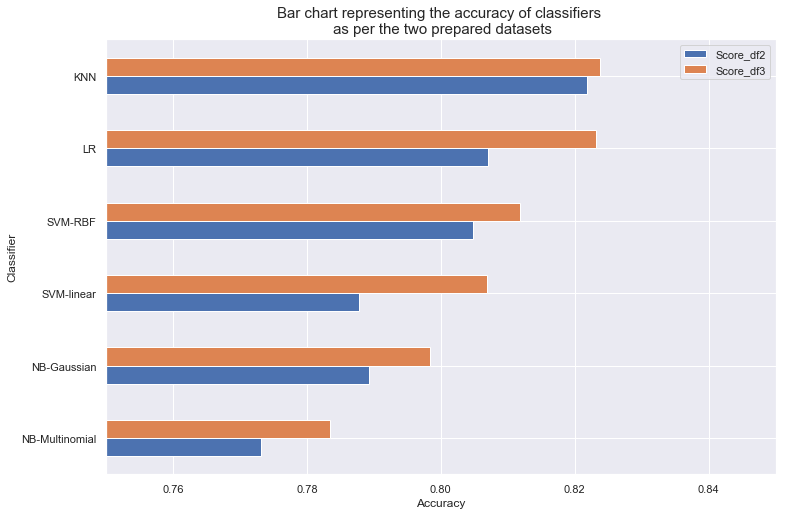

In [42]:
s1=pd.Series(['KNN','NB-Gaussian','NB-Multinomial','LR','SVM-linear','SVM-RBF'],name='Classifier')
s2=pd.Series(score_df2,name='Score_df2')
s3=pd.Series(score_df3,name='Score_df3')
s=pd.concat([s1,s2,s3],axis=1)
s = s.set_index('Classifier')
s.sort_values(by='Score_df3').plot.barh(figsize=(12,8))
plt.xlim(0.75,0.85)
plt.xlabel("Accuracy")
plt.title("Bar chart representing the accuracy of classifiers \n as per the two prepared datasets",fontsize=15);

# 2. Parameter Tuning

## K-NN classifier

### a. Number of neighbours (K)

In [43]:
K=[]
s_k=[]
for k in range(1,21):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    score = metrics.accuracy_score(y_pred, y_valid)
#print(str('For K='+str(k)+', the accuracy is: '+str(score)))
    K+=[k]
    s_k+=[score]

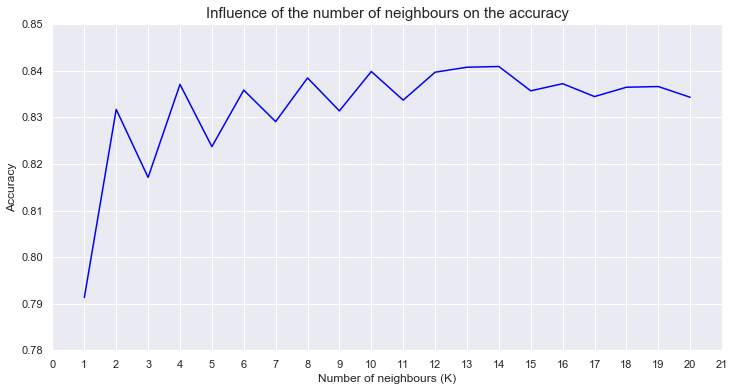

In [44]:
plt.figure(figsize=(12,6))
plt.plot(K,s_k, color='blue')
plt.xlim(1,20)
plt.ylim(0.78,0.85)
plt.xlabel("Number of neighbours (K)")
plt.ylabel("Accuracy")
plt.xticks(range(0,22))
plt.title("Influence of the number of neighbours on the accuracy",fontsize=15);

In [45]:
#Best K is 14. 
print(str('For K=14, the accuracy is: '+str(s_k[13])))

For K=14, the accuracy is: 0.8409090909090909


### b. Type of weight

In [46]:
clf = neighbors.KNeighborsClassifier(n_neighbors=14, weights='distance')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
score = metrics.accuracy_score(y_pred, y_valid)
print('Accuracy in the case of weighted neighbours by the inverse of their distance is: '+str(score))
#I will keep the weighting uniform (i.e. neighours weighted equally) as the accuracy is higher than if these neighours are
#weighted by the inverse of their distance.  

Accuracy in the case of weighted neighbours by the inverse of their distance is: 0.8333845208845209


### c. Type of distance (p)

In [47]:
P=[]
s_p=[]
for p in range(1,21):
    clf = neighbors.KNeighborsClassifier(n_neighbors=14, p=p)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    score = metrics.accuracy_score(y_pred, y_valid)
    P+=[p]
    s_p+=[score]
#print('For Minkowski distance with p='+str(i)+', the accuracy is: '+str(score))  

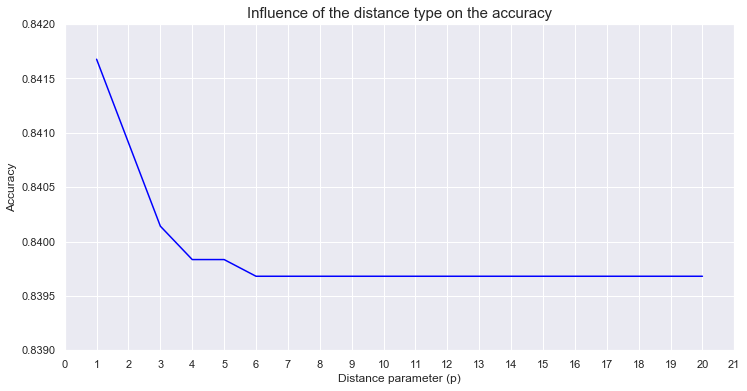

In [48]:
plt.figure(figsize=(12,6))
plt.plot(P,s_p, color='blue')
plt.xlim(1,20)
plt.ylim(0.839,0.842)
plt.xlabel("Distance parameter (p)")
plt.ylabel("Accuracy")
plt.xticks(range(0,22))
plt.title("Influence of the distance type on the accuracy",fontsize=15);

In [49]:
#The best distance is when p=1, i.e., the Manhattan distance. 
print('For Minkowski distance with p=1, the accuracy is: '+str(s_p[0]))  

For Minkowski distance with p=1, the accuracy is: 0.8416769041769042


In [50]:
#Best parameters: K=14, Weight=uniform (default), Distance=1 (Manhattan). 
clf = neighbors.KNeighborsClassifier(n_neighbors=14,p=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for KNN, after tuning: '+str(metrics.accuracy_score(y_pred, y_valid)))

Accuracy for KNN, after tuning: 0.8416769041769042


## Logistic Regression classifier

### a. Regularisation parameter (C)

In [51]:
for i in [0.001,0.01,0.1,1,10,100]:
    clf = linear_model.LogisticRegression(C=i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    score=metrics.accuracy_score(y_valid,y_pred)
    print('For C='+str(i)+', the accuracy is: '+str(score))

For C=0.001, the accuracy is: 0.8049754299754299
For C=0.01, the accuracy is: 0.8161855036855037
For C=0.1, the accuracy is: 0.8224815724815725
For C=1, the accuracy is: 0.8232493857493858
For C=10, the accuracy is: 0.8218673218673219
For C=100, the accuracy is: 0.8226351351351351


In [52]:
a=[]
b=[]
for i in range(1,51):
    clf = linear_model.LogisticRegression(C=i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    score=metrics.accuracy_score(y_valid,y_pred)
    a+=[i]
    b+=[score]

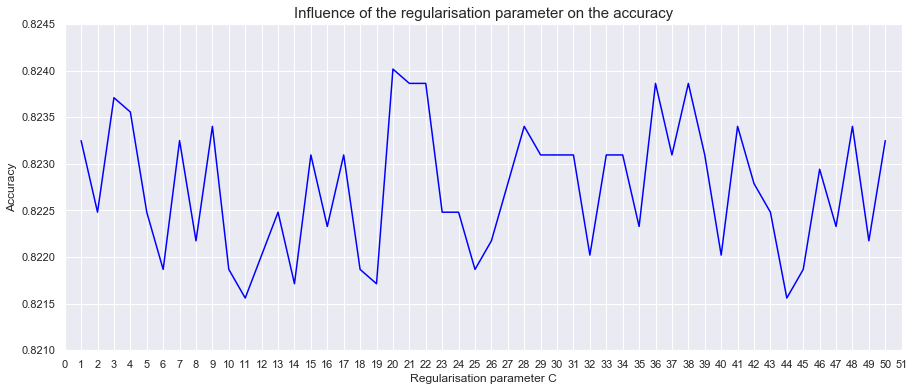

In [53]:
plt.figure(figsize=(15,6))
plt.plot(a,b, color='blue')
plt.xlim(1,50)
plt.ylim(0.821,0.8245)
plt.xlabel("Regularisation parameter C")
plt.ylabel("Accuracy")
plt.xticks(range(0,52))
plt.title("Influence of the regularisation parameter on the accuracy",fontsize=15);

In [54]:
#C=20 is the best.
print('For C=20, the accuracy is: '+str(b[19]))

For C=20, the accuracy is: 0.824017199017199


### b. Penalization mode

In [55]:
for i in ['l1','l2']:
    clf = linear_model.LogisticRegression(penalty=i,C=20)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    score=metrics.accuracy_score(y_valid,y_pred)
    print('For penalty= '+i+', the accuracy is: '+str(score))
#the mode 'l2' (which is by default) is the best.  

For penalty= l1, the accuracy is: 0.8235565110565111
For penalty= l2, the accuracy is: 0.824017199017199


In [56]:
#Best parameters: C=20, penalty='l2' (default). 
clf = linear_model.LogisticRegression(C=20)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for LR, after tuning :'+str(metrics.accuracy_score(y_valid,y_pred)))

Accuracy for LR, after tuning :0.824017199017199


# 3. Feature Engineering

## I. Improving existing features

### 1. Encoding (converting relevant categorical features)

#### - "Marital Status" with one-hot method:

In [57]:
df4=pd.DataFrame(df3.values, columns=['age','employer type','educational level','marital status','job type','relationship status'\
                                     ,'ethnicity','sex','capital gains','capital losses','hours worked per week',\
                                    'country of birth','high income?'])

In [58]:
df4=pd.concat([df4,pd.get_dummies(df4['marital status'],prefix='is')],axis=1)

In [59]:
X=df4.iloc[:,[0,2,8,9,10,13,14,15,16,17,18,19]]
X=X.values
y=df4['high income?'].values
rs = np.random.RandomState(seed=10)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.4, shuffle=True,random_state=rs)
x_test, x_valid, y_test, y_valid = model_selection.train_test_split(x_test,y_test, test_size = 0.5, shuffle=True,random_state=rs)

clf = neighbors.KNeighborsClassifier(n_neighbors=14,p=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for KNN: '+str(metrics.accuracy_score(y_pred, y_valid)))

clf = linear_model.LogisticRegression(C=20)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for LR: '+str(metrics.accuracy_score(y_valid,y_pred)))


Accuracy for KNN: 0.859029484029484
Accuracy for LR: 0.8453624078624079


#### -"Job type" with ordinal encoding

In [60]:
df5=pd.DataFrame(df4.values, columns=['age','employer type','educational level','marital status','job type','relationship status'\
                                     ,'ethnicity','sex','capital gains','capital losses','hours worked per week',\
                                    'country of birth','high income?','is_Divorced','is_Married-AF-spouse',\
                                      'is_Married-civ-spouse','is_Married-spouse-absent','is_Never-married','is_Separated',\
                                     'is_Widowed'])

In [61]:
rank_mapping={'Exec-managerial':3,'Adm-clerical':2,'Craft-repair':2,'Sales':2,'Machine-op-inspct':2,'Prof-specialty':2,\
              'Other-service':2,'Tech-support':2,'Transport-moving':2,'Handlers-cleaners':1,'Protective-serv':2,\
              'Farming-fishing':1,'Priv-house-serv':1,'Armed-Forces':2,'no-job':1}
df5['job type_new']=df5['job type'].map(rank_mapping)

In [62]:
X=df5.iloc[:,[0,2,8,9,10]+list(range(13,21))]
X=X.values
y=df5['high income?'].values
rs = np.random.RandomState(seed=10)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.4, shuffle=True,random_state=rs)
x_test, x_valid, y_test, y_valid = model_selection.train_test_split(x_test,y_test, test_size = 0.5, shuffle=True,random_state=rs)

clf = neighbors.KNeighborsClassifier(n_neighbors=14,p=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for KNN: '+str(metrics.accuracy_score(y_pred, y_valid)))

clf = linear_model.LogisticRegression(C=20)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for LR: '+str(metrics.accuracy_score(y_valid,y_pred)))

Accuracy for KNN: 0.8570331695331695
Accuracy for LR: 0.8496621621621622


#### -"employer type" encoding with One-Hot method

In [63]:
df6=pd.DataFrame(df4.values, columns=['age','employer type','educational level','marital status','job type','relationship status'\
                                     ,'ethnicity','sex','capital gains','capital losses','hours worked per week',\
                                    'country of birth','high income?','is_Divorced','is_Married-AF-spouse',\
                                      'is_Married-civ-spouse','is_Married-spouse-absent','is_Never-married','is_Separated',\
                                     'is_Widowed'])

In [64]:
df6=pd.concat([df6,pd.get_dummies(df6['job type'],prefix='is')],axis=1)

In [65]:
X=df6.iloc[:,[0,2,8,9,10]+list(range(13,35))]
X=X.values
y=df6['high income?'].values
rs = np.random.RandomState(seed=10)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.4, shuffle=True,random_state=rs)
x_test, x_valid, y_test, y_valid = model_selection.train_test_split(x_test,y_test, test_size = 0.5, shuffle=True,random_state=rs)

clf = neighbors.KNeighborsClassifier(n_neighbors=14,p=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for KNN: '+str(metrics.accuracy_score(y_pred, y_valid)))

clf = linear_model.LogisticRegression(C=20)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for LR: '+str(metrics.accuracy_score(y_valid,y_pred)))

Accuracy for KNN: 0.8584152334152334
Accuracy for LR: 0.8539619164619164


### 2. Binning

#### - "Age" with equal bins:

In [66]:
df7=pd.DataFrame(df4.values, columns=['age','employer type','educational level','marital status','job type','relationship status'\
                                     ,'ethnicity','sex','capital gains','capital losses','hours worked per week',\
                                    'country of birth','high income?','is_Divorced','is_Married-AF-spouse',\
                                      'is_Married-civ-spouse','is_Married-spouse-absent','is_Never-married','is_Separated',\
                                     'is_Widowed'])

In [67]:
df7['age_binned']=pd.cut(df7.age,bins=5,labels=range(1,6))

In [68]:
X=df7.iloc[:,[2,8,9,10]+list(range(13,21))]
X=X.values
y=df7['high income?'].values
rs = np.random.RandomState(seed=10)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.4, shuffle=True,random_state=rs)
x_test, x_valid, y_test, y_valid = model_selection.train_test_split(x_test,y_test, test_size = 0.5, shuffle=True,random_state=rs)

clf = neighbors.KNeighborsClassifier(n_neighbors=14,p=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for KNN: '+str(metrics.accuracy_score(y_pred, y_valid)))

clf = linear_model.LogisticRegression(C=20)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for LR: '+str(metrics.accuracy_score(y_valid,y_pred)))

Accuracy for KNN: 0.8637899262899262
Accuracy for LR: 0.8447481572481572


#### -"age" with fixed bins

In [69]:
df8=pd.DataFrame(df4.values, columns=['age','employer type','educational level','marital status','job type','relationship status'\
                                     ,'ethnicity','sex','capital gains','capital losses','hours worked per week',\
                                    'country of birth','high income?','is_Divorced','is_Married-AF-spouse',\
                                      'is_Married-civ-spouse','is_Married-spouse-absent','is_Never-married','is_Separated',\
                                     'is_Widowed'])

In [70]:
df8['age_binned']=pd.cut(df8.age,bins=[16,25,35,45,55,66,90],labels=['Under 25','25-35','35-45','45-55','55-66','66+'])

In [71]:
rank_mapping={'Under 25':1,'25-35':2,'35-45':3,'45-55':4,'55-66':5,'66+':6}
df8['age_mapped']=df8['age_binned'].map(rank_mapping)

In [72]:
X=df8.iloc[:,[2,8,9,10]+list(range(13,20))+[21]]
X=X.values
y=df8['high income?'].values
rs = np.random.RandomState(seed=10)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.4, shuffle=True,random_state=rs)
x_test, x_valid, y_test, y_valid = model_selection.train_test_split(x_test,y_test, test_size = 0.5, shuffle=True,random_state=rs)

clf = neighbors.KNeighborsClassifier(n_neighbors=14,p=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for KNN: '+str(metrics.accuracy_score(y_pred, y_valid)))

clf = linear_model.LogisticRegression(C=20)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for LR: '+str(metrics.accuracy_score(y_valid,y_pred)))

Accuracy for KNN: 0.8602579852579852
Accuracy for LR: 0.8444410319410319


### 3. Rescaling

#### -Normalisation

In [73]:
df9=pd.DataFrame(df7.values, columns=['age','employer type','educational level','marital status','job type','relationship status'\
                                     ,'ethnicity','sex','capital gains','capital losses','hours worked per week',\
                                    'country of birth','high income?','is_Divorced','is_Married-AF-spouse',\
                                      'is_Married-civ-spouse','is_Married-spouse-absent','is_Never-married','is_Separated',\
                                     'is_Widowed','age_binned'])

In [74]:
min_max_scaler = preprocessing.MinMaxScaler()
df9['age_norm']=min_max_scaler.fit_transform(df9['age'].values.reshape(-1,1))
df9['edu_norm']=min_max_scaler.fit_transform(df9['educational level'].values.reshape(-1,1))
df9['cap_gain_norm']=min_max_scaler.fit_transform(df9['capital gains'].values.reshape(-1,1))
df9['cap_loss_norm']=min_max_scaler.fit_transform(df9['capital losses'].values.reshape(-1,1))
df9['hours_norm']=min_max_scaler.fit_transform(df9['hours worked per week'].values.reshape(-1,1))

C:\Users\Amine\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Amine\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Amine\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Amine\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Amine\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to

In [75]:
X=df9.iloc[:,list(range(13,20))+list(range(21,26))]
X=X.values
y=df9['high income?'].values
rs = np.random.RandomState(seed=10)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.4, shuffle=True,random_state=rs)
x_test, x_valid, y_test, y_valid = model_selection.train_test_split(x_test,y_test, test_size = 0.5, shuffle=True,random_state=rs)

clf = neighbors.KNeighborsClassifier(n_neighbors=14,p=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for KNN: '+str(metrics.accuracy_score(y_pred, y_valid)))

clf = linear_model.LogisticRegression(C=20)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for LR: '+str(metrics.accuracy_score(y_valid,y_pred)))

Accuracy for KNN: 0.8378378378378378
Accuracy for LR: 0.8447481572481572


#### -Log transformation on age

In [76]:
df10=pd.DataFrame(df7.values, columns=['age','employer type','educational level','marital status','job type','relationship status'\
                                     ,'ethnicity','sex','capital gains','capital losses','hours worked per week',\
                                    'country of birth','high income?','is_Divorced','is_Married-AF-spouse',\
                                      'is_Married-civ-spouse','is_Married-spouse-absent','is_Never-married','is_Separated',\
                                     'is_Widowed','age_binned'])

In [77]:
def log_10(x):
        return np.log10(x)
df10['age_log']=log_10(list(df10['age']))

C:\Users\Amine\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Histogram showing age_log distribution')

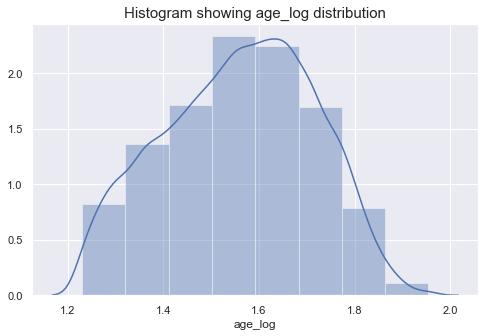

In [78]:
plt.figure(figsize=(8,5))
sns.distplot(df10['age_log'],kde=True,bins=8,color='b')
plt.title('Histogram showing age_log distribution',fontsize=15)

#### -Log transformation on capital gains and capital losses

In [79]:
df11=pd.DataFrame(df7.values, columns=['age','employer type','educational level','marital status','job type','relationship status'\
                                     ,'ethnicity','sex','capital gains','capital losses','hours worked per week',\
                                    'country of birth','high income?','is_Divorced','is_Married-AF-spouse',\
                                      'is_Married-civ-spouse','is_Married-spouse-absent','is_Never-married','is_Separated',\
                                     'is_Widowed','age_binned'])

In [80]:
for i in df11.index:
    if df11.loc[i,'capital gains']==0:
        df11.loc[i,'capital gains_log']=0
    else:
        df11.loc[i,'capital gains_log']=np.log10(df11.loc[i,'capital gains'])
    if df11.loc[i,'capital losses']==0:
        df11.loc[i,'capital losses_log']=0
    else:
        df11.loc[i,'capital losses_log']=np.log10(df11.loc[i,'capital losses'])

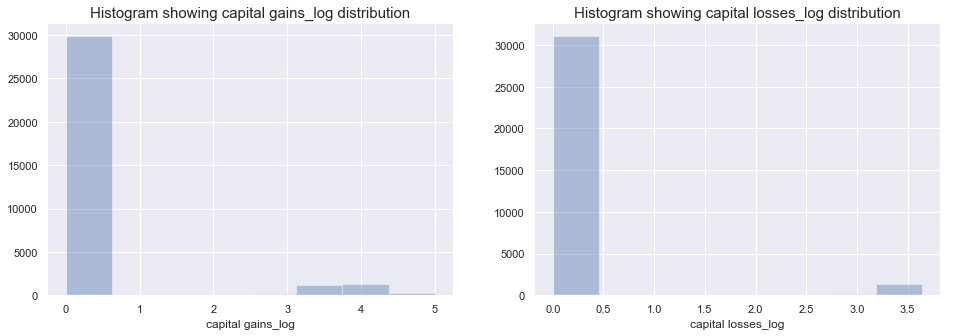

In [81]:
plt.figure(figsize=(16,5))
fig = plt.subplot(121)
sns.distplot(df11['capital gains_log'],kde=False,bins=8,color='b')
plt.title('Histogram showing capital gains_log distribution',fontsize=15)
fig = plt.subplot(122)
sns.distplot(df11['capital losses_log'],kde=False,bins=8,color='b')
plt.title('Histogram showing capital losses_log distribution',fontsize=15)
plt.show()


### 3. Retired? as indicator variable

In [82]:
df12=pd.DataFrame(df7.values, columns=['age','employer type','educational level','marital status','job type','relationship status'\
                                     ,'ethnicity','sex','capital gains','capital losses','hours worked per week',\
                                    'country of birth','high income?','is_Divorced','is_Married-AF-spouse',\
                                      'is_Married-civ-spouse','is_Married-spouse-absent','is_Never-married','is_Separated',\
                                     'is_Widowed','age_binned'])

In [83]:
df12['Retired?']=np.where(df12['age']>66,1,0)

In [84]:
X=df12.iloc[:,[2,8,9,10]+list(range(13,22))]
X=X.values
y=df12['high income?'].values
rs = np.random.RandomState(seed=10)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.4, shuffle=True,random_state=rs)
x_test, x_valid, y_test, y_valid = model_selection.train_test_split(x_test,y_test, test_size = 0.5, shuffle=True,random_state=rs)

clf = neighbors.KNeighborsClassifier(n_neighbors=14,p=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for KNN, so far:'+str(metrics.accuracy_score(y_pred, y_valid)))

clf = linear_model.LogisticRegression(C=20)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
print('Accuracy for LR :'+str(metrics.accuracy_score(y_valid,y_pred)))

Accuracy for KNN, so far:0.8644041769041769
Accuracy for LR :0.8450552825552825


# 5. Results (Testing data)

In [89]:
X=df12.iloc[:,[2,8,9,10]+list(range(13,22))]
X=X.values
y=df12['high income?'].values
rs = np.random.RandomState(seed=10)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.4, shuffle=True,random_state=rs)
x_test, x_valid, y_test, y_valid = model_selection.train_test_split(x_test,y_test, test_size = 0.5, shuffle=True,random_state=rs)

clf = neighbors.KNeighborsClassifier(n_neighbors=14,p=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy on testing data is:'+str(metrics.accuracy_score(y_pred, y_test)))

Accuracy on testing data is:0.8585687960687961
